In [1]:
from pathlib import Path
from importlib import reload

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import moabb.datasets

import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [2]:
sampling_rate = 1000

In [3]:
from sp300_dataset import BrainWaves_SP
m_data = BrainWaves_SP(kind = "train", normalize = False)

100%|██████████| 7650/7650 [00:37<00:00, 202.97it/s]

train kind 7650 7650 7650
main_job done


In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import transformers
from transformers import Transformer

In [14]:
class PrintTransformer(Transformer):
    def __init__(self, name=""):
        self.name = name

    def transform(self, x):
        # print(x.shape, x)
        x = np.stack(x, axis=0)
        # print(x.shape , self.name)

        return x 

In [15]:
sampling_rate = 1000
decimation_factor = 10
final_rate = sampling_rate // decimation_factor
epoch_duration = 1.8 # seconds


eeg_pipe = make_pipeline(
    transformers.Decimator(decimation_factor),
    PrintTransformer(name='de'),
    transformers.ButterFilter(sampling_rate // decimation_factor, 4, 0.5, 20),
    PrintTransformer(name='bu'),
    transformers.ChannellwiseScaler(StandardScaler())
    
)
# markers_pipe = transformers.MarkersTransformer(labels_mapping, decimation_factor)

In [16]:
for eegs, _ in m_data:
    print(eegs)
    eeg_pipe.fit(eegs)
    break

tensor([[-39711.7188, -39711.0898, -39717.1289,  ..., -39673.1797,
         -39672.5117, -39671.1289],
        [ -3949.5500,  -3954.8301,  -3954.1101,  ...,  -3892.1101,
          -3893.0901,  -3894.7500],
        [ 48808.7891,  48806.1992,  48805.3906,  ...,  48828.9102,
          48827.0703,  48826.3984],
        ...,
        [ 28441.7500,  28441.9707,  28442.4199,  ...,  28521.0000,
          28520.5605,  28519.0801],
        [ 32851.1211,  32851.4297,  32853.4883,  ...,  32882.4609,
          32881.3398,  32880.5781],
        [ 40801.7695,  40802.4805,  40805.0312,  ...,  40797.4297,
          40797.0703,  40797.3398]])


In [17]:
# del raw_dataset

x = eeg_pipe.transform(m_data[0][0])

In [9]:
# #  Applies a preprocessing pipeline (eeg_pipe) to the raw EEG data (raw_sample). 
# epoch = m_data[0][0]
# plt.figure(figsize=(20, 15))

# plt.plot(epoch.T + np.arange(len(epoch))*5)
# plt.yticks([])
# plt.xticks(np.arange(0, 180, 10), np.arange(0, 1800, 100))
# plt.xlabel('seconds', fontsize=15)
# plt.ylabel('channels', fontsize=15)
# plt.title('Filtered EEG signal of one run of the game')
# plt.show()

(8, 180)


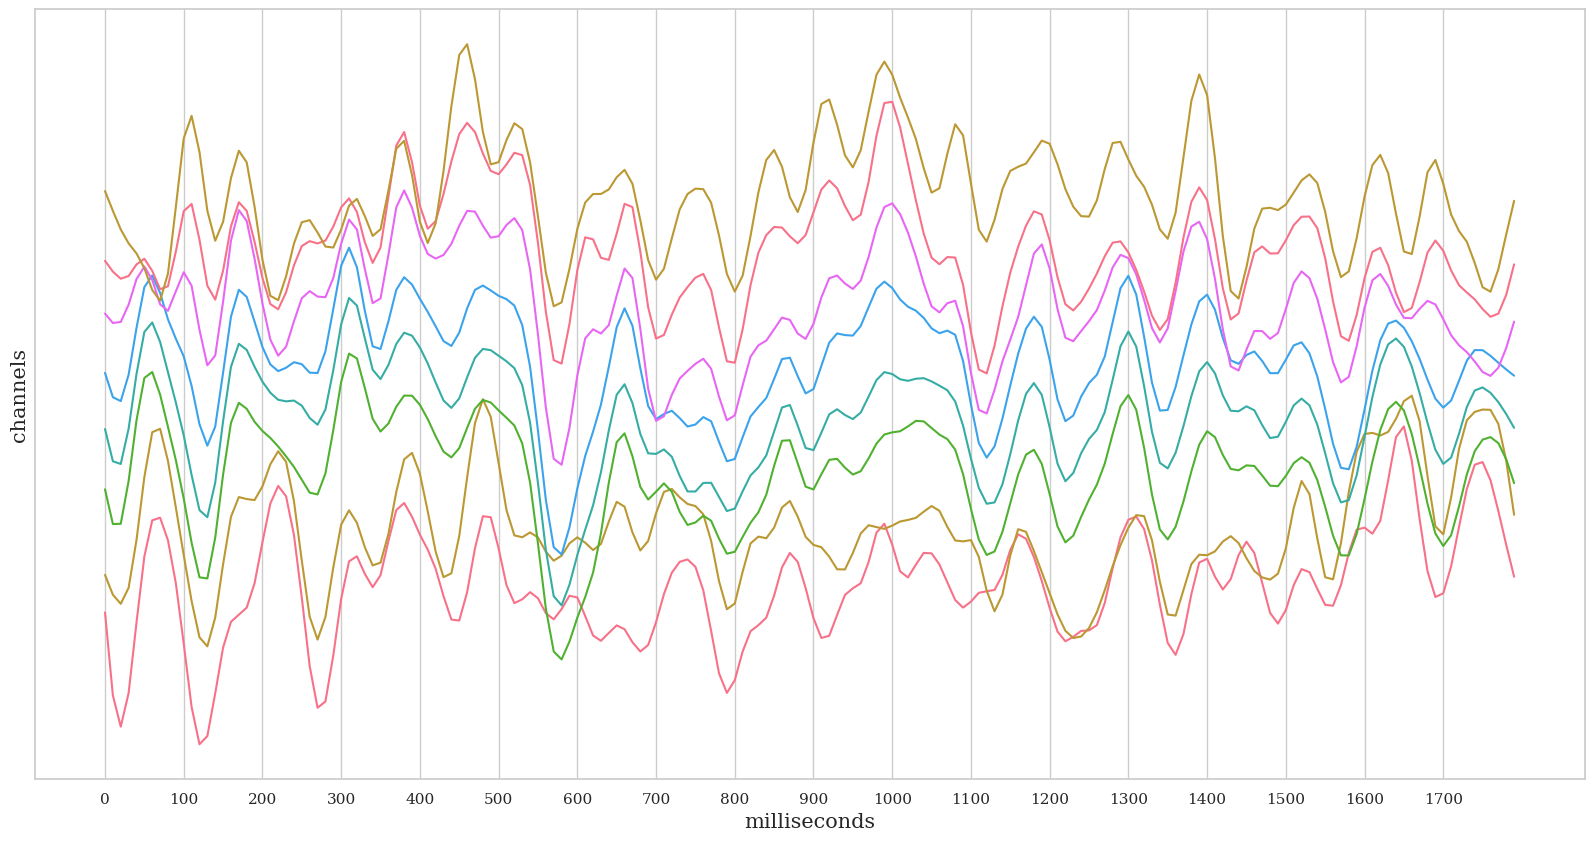

In [10]:
epoch = x
print(epoch.shape)
plt.figure(figsize=(20, 10))
plt.plot(epoch.T + np.arange(len(epoch)))
plt.yticks([])
# labeling them in intervals of 200 milliseconds.
plt.xticks(np.arange(0, 180, 10), np.arange(0, 1800, 100))
plt.xlabel('milliseconds', fontsize=15)
plt.ylabel('channels', fontsize=15)
plt.show()

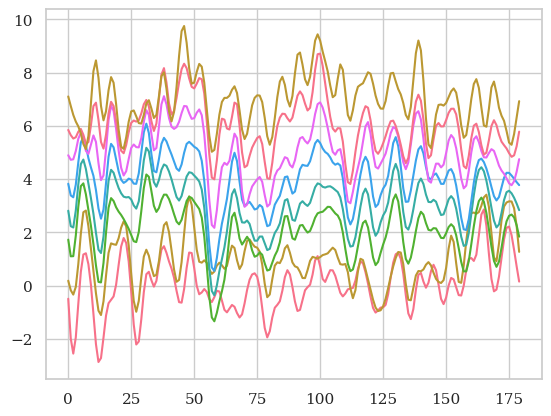

In [11]:
plt.plot(epoch.T + np.arange(len(epoch)))

In [12]:
epoch.shape

(8, 180)

In [18]:
import numpy as np
from tqdm import tqdm



# Pre-allocate arr with the final shape (8, 1800)
arr = np.empty((7650,8, 180))

# Use a loop to assign each row directly
for idx, (i, _) in tqdm(enumerate(m_data), total=len(m_data)):
    arr[idx, :] = eeg_pipe.transform(i)  # Assign directly to the row

print("Shape of arr:", arr.shape)


100%|██████████| 7650/7650 [00:41<00:00, 185.12it/s]

Shape of arr: (7650, 8, 180)


In [19]:
arr[0]

array([[-0.49690431, -1.99218142, -2.55601788, ...,  1.33119202,
         0.72253323,  0.14778946],
       [-0.82001609, -1.17702758, -1.34087753, ...,  1.90071666,
         1.23569727,  0.26370016],
       [-0.27724415, -0.9030019 , -0.8984679 , ...,  0.55567336,
         0.26448709, -0.16460729],
       ...,
       [-0.10857116, -0.27835837, -0.25961328, ..., -1.08458996,
        -0.72894353, -0.25433487],
       [-0.15807356, -0.35223433, -0.48056802, ..., -1.10978734,
        -0.77087379, -0.22163388],
       [ 0.09909112, -0.25651792, -0.59218502, ..., -1.30934322,
        -0.68308562, -0.07596913]])

In [20]:
all_labels = [labels for _, labels in m_data]


In [21]:
all_labels

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


In [22]:
import numpy as np



# Ensure all labels are 1D before concatenating
all_labels = np.concatenate([np.atleast_1d(labels) for _, labels in m_data])

# print("Shape of all_labels:", all_labels.shape)

# # Count unique elements and their occurrences
# uniques, counts = np.unique(all_labels, return_counts=True)
# print("Unique labels:", uniques)
# print("Counts:", counts)


2.1572430870821298


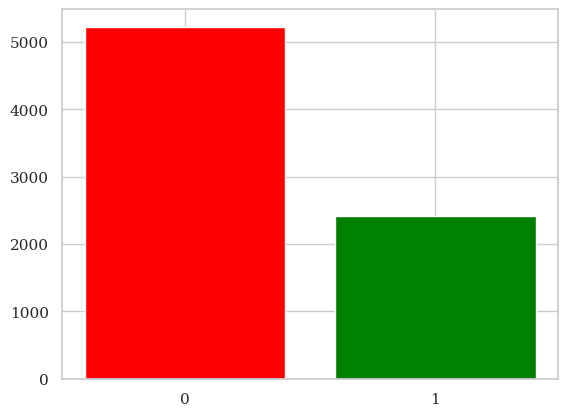

In [23]:
# all_labels = np.concatenate([labels for _, labels in m_data])
# print(all_labels.shape)
uniques, counts = np.unique(all_labels, return_counts=True)
captions = {0: 'empty', 1: 'target'}
plt.bar(uniques, counts, color=['r', 'g'])
plt.xticks(uniques)

print(counts[0] / counts[1])

[0 0 1 ... 0 0 1]
[0 0 1 ... 0 0 1]


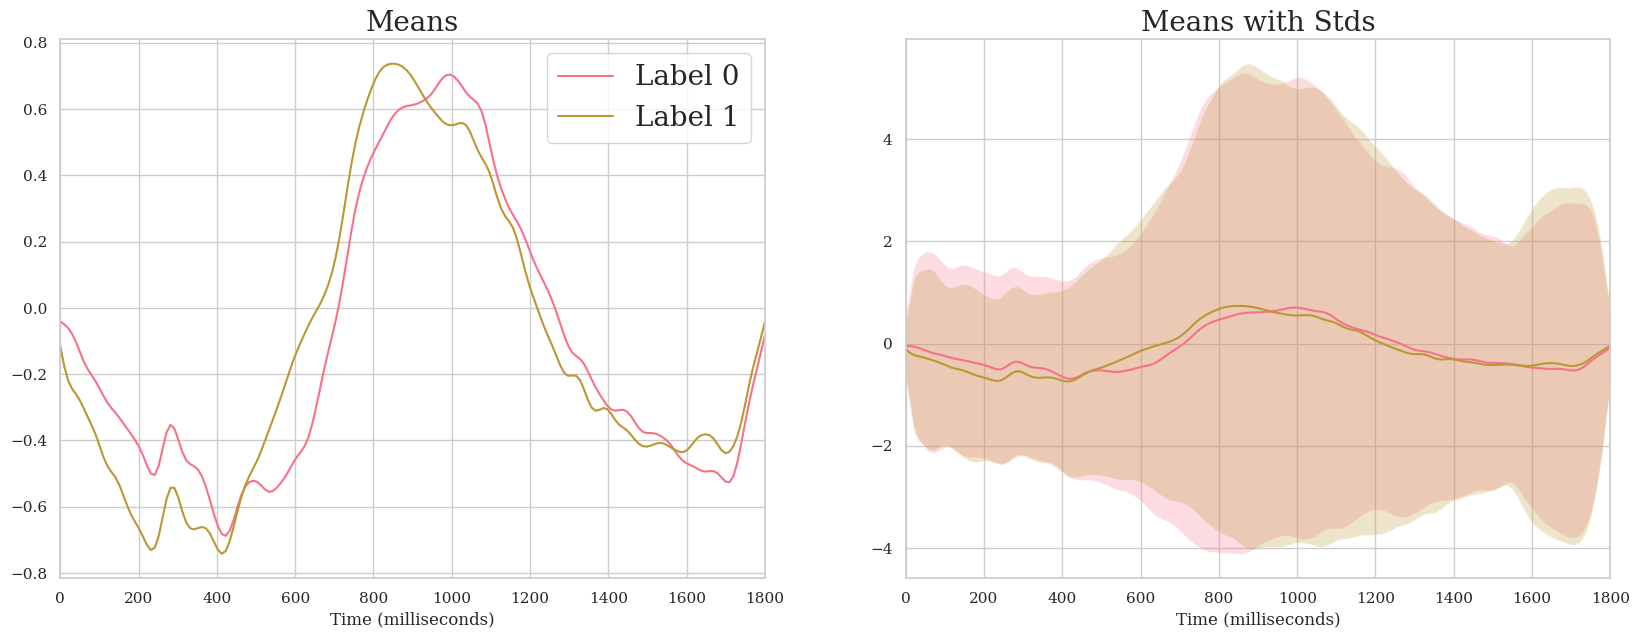

In [24]:
# def plot_by_labels(epochs, labels):
#     fig, axes = plt.subplots(1, 2, figsize=(20, 7))
#     for label in (0, 1):
#         mean = epochs[labels == label].mean(axis=(0, 1))
#         std = epochs[labels == label].std(axis=(0, 1))
#         # print(mean, len(std))
#         axes[0].plot(mean, label=captions[label])

#         axes[1].plot(mean, label=captions[label])
#         axes[1].fill_between(np.arange(mean.size), mean-std, mean+std, alpha=0.25)

#     axes[0].legend(fontsize=20)
#     axes[0].set_ylim(-0.16, 0.26)
#     axes[1].set_ylim(-0.8, 0.85)
#     for i, title in enumerate(('Means', 'Means with Stds')):
#         axes[i].set_title(title, fontsize=20)
#         # axes[i].xticks(np.arange(0, 180, 10), np.arange(0, 1800, 100))
#         # axes[i].set_xticklabels(np.arange(0, 180, 10))
#         # plt.xticks(np.arange(0, 180, 10), np.arange(0, 1800, 100))
#         axes[i].set_xlabel('milliseconds')

# plot_by_labels(arr, all_labels)

import numpy as np
import matplotlib.pyplot as plt

def plot_by_labels(epochs, labels):
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))
    for label in (0, 1):
        print(labels)
        mean = epochs[labels == label].mean(axis=(0, 1))
        std = epochs[labels == label].std(axis=(0, 1))
        
        axes[0].plot(mean, label=f"Label {label}")
        axes[1].plot(mean, label=f"Label {label}")
        axes[1].fill_between(np.arange(mean.size), mean - std, mean + std, alpha=0.25)

    # Set x-axis limits to full range (0 to 1800 ms)
    for ax in axes:
        ax.set_xlim(0, mean.size - 1)  # Match x-axis to full data range
        ax.set_xticks(np.linspace(0, mean.size - 1, 10))
        ax.set_xticklabels(np.linspace(0, 1800, 10).astype(int))

    # Remove specific y-axis limits to display all data points
    axes[0].legend(fontsize=20)
    for i, title in enumerate(('Means', 'Means with Stds')):
        axes[i].set_title(title, fontsize=20)
        axes[i].set_xlabel('Time (milliseconds)')

plot_by_labels(arr, all_labels)



In [25]:

all_labels == 1

array([False, False,  True, ..., False, False,  True])

In [26]:
all_labels.shape

(7650,)

In [27]:
arr[0].shape

(8, 180)

[0 0 1]
[0 0 1]


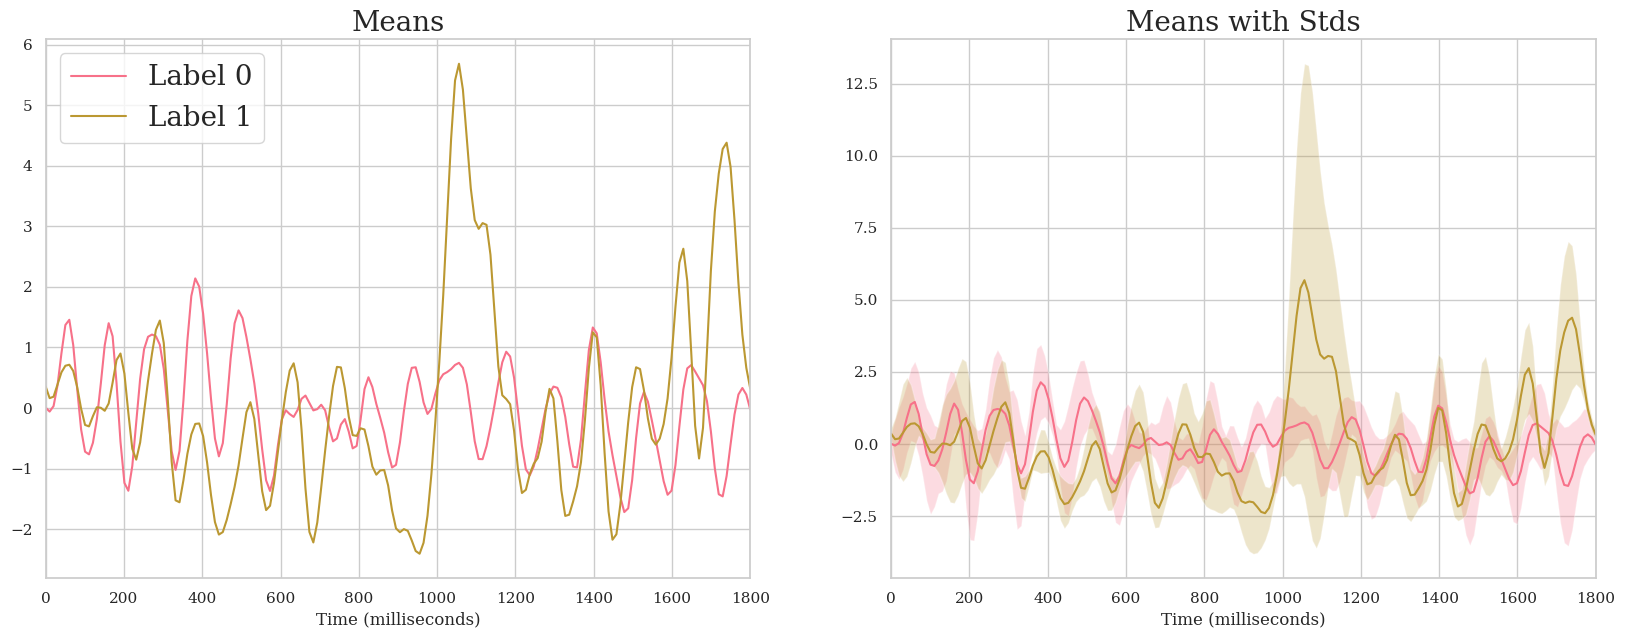

In [28]:
plot_by_labels(arr[0:3], all_labels[0:3])

In [29]:
# Assuming `dataset` is your dataset object and each item is in the form (numpy_array, label)
combined_data_with_labels = [(data, label) for data, label in m_data]

# Convert it to a numpy array if needed, but keep in mind this will store each element as an object
combined_data_with_labels = np.array(combined_data_with_labels, dtype=object)

C:\Users\zokov\AppData\Local\Temp\ipykernel_34912\331663656.py:5: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  combined_data_with_labels = np.array(combined_data_with_labels, dtype=object)


100
(8, 180) oy ebitch
(7650, 3) (7650, 8, 180) hgere at last
Subtracting Evoked from Epochs
[done]


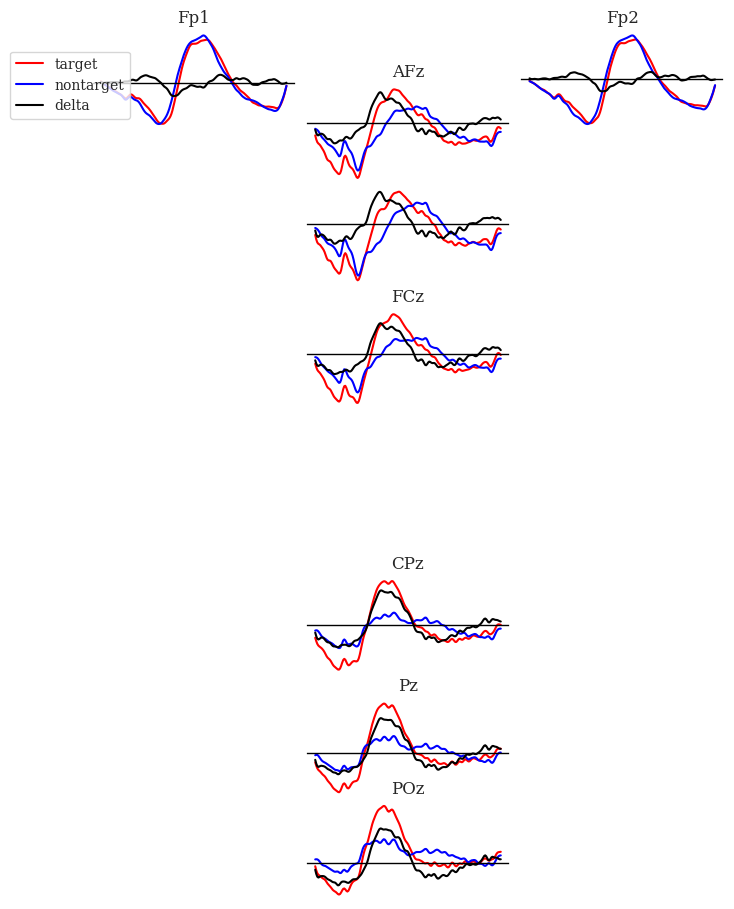

In [30]:
import visualizers
reload(visualizers)
print(final_rate)
visualizers.plot_evoked_electrodes((arr, all_labels), final_rate, ['Fp1','Fp2','Fz','AFz','FCz','CPz','Pz','POz'])


In [31]:
combined_data_with_labels.shape

(7650, 2)

(8, 180) oy ebitch
(7650, 3) (7650, 8, 180) hgere at last
Subtracting Evoked from Epochs
[done]
No projector specified for this dataset. Please consider the method self.add_proj.


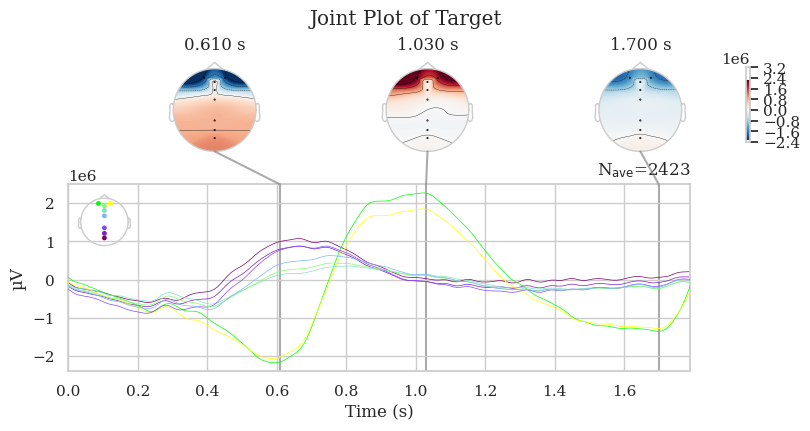

In [32]:
reload(visualizers)
    
visualizers.plot_evoked_joint((arr, all_labels), final_rate, ['Fp1','Fp2','Fz','AFz','FCz','CPz','Pz','POz'])

In [33]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
import mne
from mne.decoding import Vectorizer 

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC

from pyriemann.estimation import ERPCovariances
from pyriemann.tangentspace import TangentSpace
from pyriemann.classification import MDM
from pyriemann.spatialfilters import Xdawn

In [34]:
scores = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

In [36]:
# from https://eeg-notebooks.readthedocs.io/en/latest/visual_p300.html
# and https://mne.tools/dev/auto_examples/decoding/plot_decoding_csp_eeg.html
from mne.decoding import CSP

clfs = {
    'LR': (
        make_pipeline(Vectorizer(), LogisticRegression()),
        {'logisticregression__C': np.exp(np.linspace(-4, 4, 5))},
    ),
    'LDA': (
        make_pipeline(Vectorizer(), LDA(shrinkage='auto', solver='eigen')),
        {},
    ),
    'SVM': (
        make_pipeline(Vectorizer(), SVC()),
        {'svc__C': np.exp(np.linspace(-4, 4, 5)), 'svc__kernel': ('linear', 'rbf')},
    ),
    'CSP LDA': (
        make_pipeline(CSP(), LDA(shrinkage='auto', solver='eigen')),
        {'csp__n_components': (6, 9, 13), 'csp__cov_est': ('concat', 'epoch')},
    ),
    'Xdawn LDA': (
        make_pipeline(Xdawn(2, classes=[1]), Vectorizer(), LDA(shrinkage='auto', solver='eigen')),
        {},
    ),
    'ERPCov TS LR': (
        make_pipeline(ERPCovariances(estimator='oas'), TangentSpace(), LogisticRegression()),
        {'erpcovariances__estimator': ('lwf', 'oas')},
    ),
    'ERPCov MDM': (
        make_pipeline(ERPCovariances(), MDM()),
        {'erpcovariances__estimator': ('lwf', 'oas')},
    ),
}

In [37]:
def crossvalidate_record(arr, all_labels, scores=scores):
    df = pd.DataFrame()

    # Convert X and y to float64 precision before fitting
    # X = record[0].astype(np.float64)  # Ensure X is float64
    # y = record[1].astype(np.float64)  # Ensure y is float64

    X = arr
    y = all_labels
    # Define only the 'LR' classifier and its parameters
    name = 'LR'
    clf = make_pipeline(Vectorizer(), LogisticRegression())
    params = {'logisticregression__C': np.exp(np.linspace(-4, 4, 5))}
    
    # Initialize GridSearchCV for the 'LR' classifier
    cv = GridSearchCV(
        clf,
        params,
        scoring=scores,
        n_jobs=-1,
        refit=False,  # Not refitting a final model after CV
        cv=4,
        return_train_score=True  # To include train scores in the output
    )
    
    # Fit the model to the data (X, y)
    cv.fit(X, y)
    
    # Select the relevant results (parameters and test scores)
    headers = [
        col for col in cv.cv_results_.keys()
        if col.startswith('param_') or col.startswith('mean_test_') or col.startswith('std_test_')
    ]
    
    # Create a DataFrame for the 'LR' classifier's results
    results = pd.DataFrame(cv.cv_results_)[headers]
    results['classifier'] = name
    
    # Concatenate with the running DataFrame
    df = pd.concat((df, results), sort=False)
    
    # Reindex and sort the columns for neat output
    return df.reindex(sorted(df.columns), axis=1)

In [38]:
crossvalidate_record(arr, all_labels).sort_values('mean_test_f1', ascending=False)

,classifier,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,mean_test_roc_auc,param_logisticregression__C,std_test_accuracy,std_test_f1,std_test_precision,std_test_recall,std_test_roc_auc
0,LR,0.732677,0.503728,0.612469,0.427978,0.735363,0.018316,0.013178,0.018632,0.033606,0.011303,0.014392
4,LR,0.730325,0.502952,0.605568,0.430456,0.731531,54.59815,0.010490,0.010483,0.028887,0.003269,0.013554
3,LR,0.731633,0.502423,0.609356,0.427565,0.733040,7.389056,0.010945,0.016011,0.027370,0.010981,0.013945
2,LR,0.728757,0.502412,0.600392,0.432109,0.731422,1.0,0.009970,0.012609,0.025078,0.007013,0.015113
1,LR,0.729149,0.495950,0.604979,0.420549,0.732349,0.135335,0.010016,0.013389,0.026759,0.010988,0.013566


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from mne.decoding import Vectorizer

def crossvalidate_record(arr, all_labels, clfs=clfs, scores=scores):
    df = pd.DataFrame()

    # Ensure the record data is in float64 precision
    # X = record[0].astype(np.float64)
    # y = record[1].astype(np.float64)
    X = arr
    y = all_labels

    for name, (clf, params) in clfs.items():
        # Update the pipeline to include a FunctionTransformer for float64 precision if needed
        clf = make_pipeline(
            FunctionTransformer(lambda X: X.astype(np.float64)),  # Ensure data is float64
            Vectorizer(),  # Add the Vectorizer directly
            LogisticRegression()  # Add Logistic Regression directly
        )

        params = {'logisticregression__C': np.exp(np.linspace(-4, 4, 5))}  # Parameter grid for Logistic Regression
        
        # Initialize GridSearchCV for the current classifier
        cv = GridSearchCV(
            clf,
            params,
            scoring=scores,
            n_jobs=-1,
            refit=False,  # Not refitting a final model after CV
            cv=4,
            return_train_score=True  # To include train scores in the output
        )
        
        # Fit the model to the data (X, y)
        cv.fit(X, y)
        
        # Select relevant results (parameters and test scores)
        headers = [
            col for col in cv.cv_results_.keys()
            if col.startswith('param_') or col.startswith('mean_test_') or col.startswith('std_test_')
        ]
        
        # Create a DataFrame for the current classifier's results
        results = pd.DataFrame(cv.cv_results_)[headers]
        results['classifier'] = name  # Corrected 'cassifier' to 'classifier'
        
        # Concatenate results with the main DataFrame
        df = pd.concat((df, results), sort=False)
    
    # Reindex and sort columns for neat output
    return df.reindex(sorted(df.columns), axis=1)


In [40]:
crossvalidate_record(arr, all_labels).sort_values('mean_test_f1', ascending=False)

,classifier,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,mean_test_roc_auc,param_logisticregression__C,std_test_accuracy,std_test_f1,std_test_precision,std_test_recall,std_test_roc_auc
0,LR,0.732677,0.503728,0.612469,0.427978,0.735363,0.018316,0.013178,0.018632,0.033606,0.011303,0.014392
0,ERPCov MDM,0.732677,0.503728,0.612469,0.427978,0.735363,0.018316,0.013178,0.018632,0.033606,0.011303,0.014392
0,ERPCov TS LR,0.732677,0.503728,0.612469,0.427978,0.735363,0.018316,0.013178,0.018632,0.033606,0.011303,0.014392
0,LDA,0.732677,0.503728,0.612469,0.427978,0.735363,0.018316,0.013178,0.018632,0.033606,0.011303,0.014392
0,Xdawn LDA,0.732677,0.503728,0.612469,0.427978,0.735363,0.018316,0.013178,0.018632,0.033606,0.011303,0.014392
0,CSP LDA,0.732677,0.503728,0.612469,0.427978,0.735363,0.018316,0.013178,0.018632,0.033606,0.011303,0.014392
0,SVM,0.732677,0.503728,0.612469,0.427978,0.735363,0.018316,0.013178,0.018632,0.033606,0.011303,0.014392
4,SVM,0.730325,0.502952,0.605568,0.430456,0.731531,54.59815,0.010490,0.010483,0.028887,0.003269,0.013554
4,ERPCov TS LR,0.730325,0.502952,0.605568,0.430456,0.731531,54.59815,0.010490,0.010483,0.028887,0.003269,0.013554
4,Xdawn LDA,0.730325,0.502952,0.605568,0.430456,0.731531,54.59815,0.010490,0.010483,0.028887,0.003269,0.013554
